<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/Code_along_3/blob/master/linj%C3%A4r%20och%20polynomisk%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linjär regression, polynomisk regression - med kod

Jämförelse mellan linjär regression och linjär regression med polynom, alltså basis function regression med x = 𝜙(x upphöjt med i). 

Inspirerad av Nhan Tran i Towards Data Science. 

In [1]:
#importera nödvändiga bibliotek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importera de två dataset vi ska använda 
dataset_pos = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X_pos = dataset_pos.iloc[:, 1:-1].values
y_pos = dataset_pos.iloc[:, 2].values


dataset_sal = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv')
X_sal = dataset_sal.iloc[:, :-1].values
y_sal = dataset_sal.iloc[:, 1].values 

När nödvändiga bibliotek och det dataset vi ska använda är importerat är det dags att göra oss familjär med den data vi ska analysera. Ett bra sätt att göra det är att visualisering. Men allra först vill vi titta på de första raderna i vår data. Använd Python för att hämta dessa i kodblocket nedan. Vi vill också räkna antalet rader totalt i vårt dataset och skriva ut det, samt göra några beräkningar på data såsom medel och medianvärde på löner i respektive position.

In [2]:
#Hur stora är våra dataset?
print ('storlek positionsdata ' + str(dataset_pos.size))
print ('antal rader position' + str(dataset_pos.shape[0]))

print ('storlek lönesdata ' + str(dataset_sal.size))
print ('antal rader lön' + str(dataset_sal.shape[0]))



storlek positionsdata 30
antal rader position10
storlek lönesdata 60
antal rader lön30


In [3]:
#Ok, posititonsdata är bara 10 rader, då kan vi titta på hela
dataset_pos


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#lönedata är lite större, men ändå hanterbar, vi tittar på hela den också
dataset_sal

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Vad är det för typer av data i de olika tabellerna?

In [5]:
dataset_pos.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [6]:
dataset_sal.dtypes

YearsExperience    float64
Salary               int64
dtype: object

### Vi har en duplicering i ett av våra dataset, vilken kolumn är redundant?

### Är det lämpligt att använda 1,2,3..för position, varför/varför inte? Vilken typ av data är det?

In [7]:
dataset_pos.drop(['Position'], axis=1, inplace=True)
dataset_pos

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


Lär känna vår data lite bättre, räkna ut medel och median för löner baserat på antal år eller efter position.

In [8]:
mean_salary=dataset_sal['Salary'].mean()
print ('medellön baserat på arbetade år ' + str(mean_salary))

median_salary=dataset_sal['Salary'].median()
print ('medianlön baserat på arbetade år ' + str(median_salary))

medellön baserat på arbetade år 76003.0
medianlön baserat på arbetade år 65237.0


In [9]:
mean_salary=dataset_pos['Salary'].mean()
print ('medellön baserat på position ' + str(mean_salary))

median_salary=dataset_pos['Salary'].median()
print ('medianlön baserat på position ' + str(median_salary))

medellön baserat på position 249500.0
medianlön baserat på position 130000.0


Inte så snyggt kanske,enklare är att från panda hämta deskriptiv data direkt om sitt dataset (Dock missar vi median då).

In [10]:
print('deskriptiv data om positionsdata')
dataset_pos.describe()

deskriptiv data om positionsdata


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [11]:
print('deskriptiv statistik om lönedata')
dataset_sal.describe()

deskriptiv statistik om lönedata


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Är det meningsfull statistik i de olika tabellerna? Vad beskriver de?

Vi kan också skapa enkla korrelationsvisualiseringar (heatmaps) med exempelvis seabornbiblioteket. Inte så spännande när vi bara har två variabler, men ändå, vi gör först en för positionstabellen och sedan en för erfarenhetstabellen.

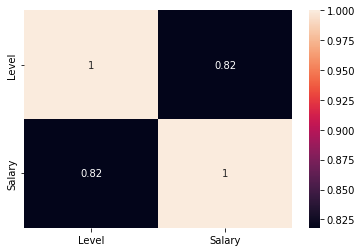

In [12]:
corrMatrix = dataset_pos.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

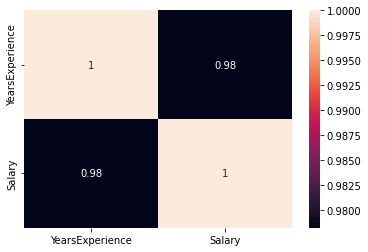

In [13]:
corrMatrix = dataset_sal.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Vi kan också skapa spridninsdiagram över relationerna mellan variablerna i våra dataset:

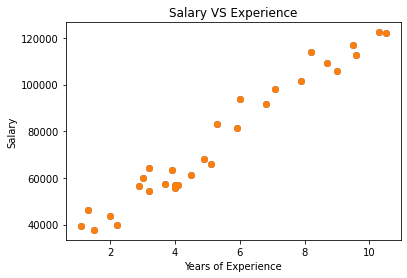

In [14]:
# Plot years experience against salary

#x_sal=dataset_sal.YearsExperience.values.reshape(1,-1)
#y_sal=dataset_sal['Salary']

X_sal = dataset_sal.iloc[:, :-1]
y_sal = dataset_sal.iloc[:, 1]


# Add labels to the graph
plt.scatter(X_sal,y_sal)
plt.title('Salary VS Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_sal, y_sal)



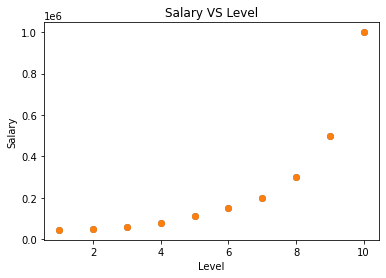

In [15]:
# Plot position against salary


X_pos = dataset_pos.iloc[:, :-1]
y_pos = dataset_pos.iloc[:, 1]


#X_pos=dataset_pos['Level'].values.reshape(1,-1)
#y_pos=dataset_pos.Salary

# Add labels to the graph
plt.scatter(X_pos,y_pos)
plt.title('Salary VS Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X_pos, y_pos)

För att skapa både tränings- och testdata behöver vi dela vårt tillgänliga data i ett träningsset och ett testset.  Koda sedan en instruktion som delar dina två datafiler så att ca 30% blir testdata och 70% blir träningsdata. 

Ta dig sedan en funderare och reflektera över om detta är menignsfullt för dessa två tabeller och varför?

In [16]:
# dela data mellan testdata och träningsdata för positionstabellen, är det här egentligen meningsfullt?
from sklearn.model_selection import train_test_split 
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.3)

Nu är det dags att ta en titt på en linjär regression approximering av vårt data, alltså att visualisera hur en rät linje kan anpassas till vårt data. För detta använder vi biblioteket sklearn som har metoder för linjär regression. 

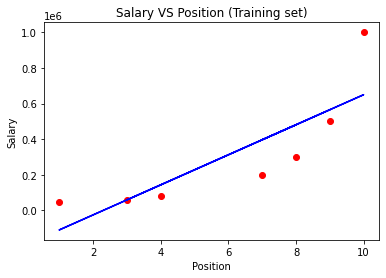

In [17]:
# Beräknar en rät linje anpassad till vårt träningdataset för positionsdata
from sklearn.linear_model import LinearRegression
lin_reg_pos = LinearRegression()
lin_reg_pos.fit(X_train_pos, y_train_pos)

#Prediktera y
y_pred_pos=lin_reg_pos.predict(X_train_pos)


# Visualisering av regressionen på träningsdata
viz_train_pos = plt
viz_train_pos.scatter(X_train_pos, y_train_pos, color='red')
viz_train_pos.plot(X_train_pos, y_pred_pos, color='blue')
viz_train_pos.title('Salary VS Position (Training set)')
viz_train_pos.xlabel('Position')
viz_train_pos.ylabel('Salary')
viz_train_pos.show()


Förutom att visualisera vårt resultat för att se hur väl vår valda modell passar vårt problem kan vi också använda beräkningar för att se hur bra vår modell är. Ett av de absolut enklaste sätten är att jämföra med medelvärdet för varje prediktkerat värde, modellen bör åtminstonde vara bättre än detta värde. 

Bättre sätt att beräkna "fit" för linjär regression är R^2 score och MSE, RMSE (Root mean square error). Dessa kan vi räkna ut direkt med hjälp av inbyggda funktioner. 

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#Beräknar kvalitetsvärden för träningsdata av positionsdata
print("mse train " + str(mean_squared_error(y_train_pos, y_pred_pos)))
print("rmse train " + str(sqrt(mean_squared_error(y_train_pos, y_pred_pos))))
print("r^2 score train "  + str(r2_score(y_train_pos, y_pred_pos)))


mse train 32330439675.870342
rmse train 179806.67305712082
r^2 score train 0.6812459795133459


In [19]:
#Dela upp dataset i testdata och träningsdata för lönetabellen
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_sal, y_sal, test_size=1/3, random_state=42)

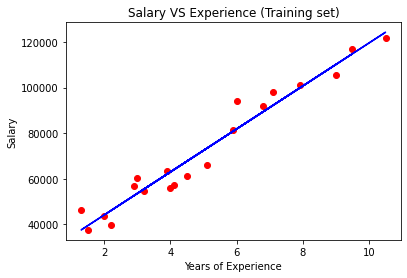

mse 29793161.082422983
rmse 5458.31119325593
r^2 score 0.9549236946181227


In [20]:
# Beräknar en rät linje anpassad till vårt träningsdata för lönedata
lin_reg_sal = LinearRegression()
lin_reg_sal.fit(X_train_sal, y_train_sal)


#Predikterar och visualiserar resultatet för träningsdata
y_pred_train_sal=lin_reg_sal.predict(X_train_sal)
viz_train = plt
viz_train.scatter(X_train_sal, y_train_sal, color='red')
viz_train.plot(X_train_sal, lin_reg_sal.predict(X_train_sal), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Years of Experience')
viz_train.ylabel('Salary')
viz_train.show()

#Predikterar för testdata


#Beräknar kvalitetsvärden för träningsdata
print("mse " + str(mean_squared_error(y_train_sal, y_pred_train_sal)))
print("rmse " + str(sqrt(mean_squared_error(y_train_sal, y_pred_train_sal))))
print("r^2 score "  + str(r2_score(y_train_sal, y_pred_train_sal)))



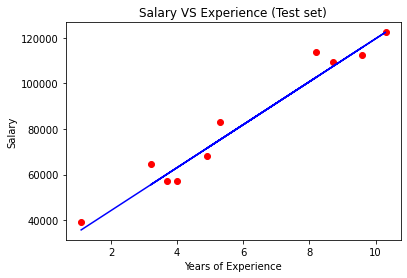

mse 35301898.887134895
rmse 5941.540110706558
r^2 score 0.9553063138044949


In [21]:
# Predikterar och visualiserar resultatet för testdata 
y_pred_test_sal=lin_reg_sal.predict(X_test_sal)
viz_test = plt
viz_test.scatter(X_test_sal, y_test_sal, color='red')
viz_test.plot(X_test_sal, y_pred_test_sal, color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Years of Experience')
viz_test.ylabel('Salary')
viz_test.show()

#Beräknar kvalitetsvärden för testsdata
print("mse " + str(mean_squared_error(y_test_sal, y_pred_test_sal)))
print("rmse " + str(sqrt(mean_squared_error(y_test_sal, y_pred_test_sal))))
print("r^2 score "  + str(r2_score(y_test_sal, y_pred_test_sal)))


### Varför gör vi inte om FIT när vi testar träningsdata?

### Märkligt att testdata är lika bra som träningsdata? En modell ska ju ha bättre FIT mot träning än mot test? (Varför?)

Ok, hur ser de ut, är en rät linje en bra approximation för våra två dataset? Vad säger våra kvalitetsvärden? 

Nja, det verkar passa utmärkt för lönedata baserat på antal år man arbetat, men betydligt sämre på lönedata baserat på position. Där behöver vi uppenbarligen testa något annat.

Vilket sätt är enklast att bestämma detta, värden eller visualisering?

Ok, då testar vi att istället anpassa en polynomiskt beräknad linje till vårt dataset med lön per position. Testa med olika grader på polynom.

OBS! Här använder jag inte test och träningsdata eftersom tabellen endast innehåller 10 rader är detta inte meningefullt och skulle inte fungera. Träningsdata skulle exempelvis bara blir 3 punkter om vi delar 70% och 30%. Samma problem finns egentligen även i lönetabellen med sina 30 rader, dock fungerar det hyfsat ändå eftersom sambandet är såpass linjärt. 

Vilken grad motsvarar vår ursprungliga linje? Vad motsvarar 0?

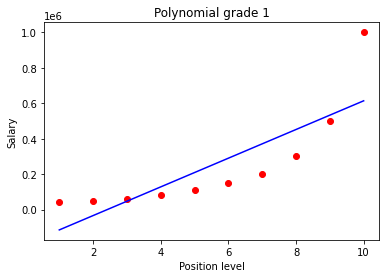

In [22]:
# Istället för en rät linje approximerar vi med hjälp av polynom för positionsdata. Här med grad 1.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X_pos)
pol_reg_pos = LinearRegression()
pol_reg_pos.fit(X_poly, y_pos)

# Visualisera den polynomiska regressionens resultat 
def viz_polymonial():
    plt.scatter(X_pos, y_pos, color='red')
    plt.plot(X_pos, pol_reg_pos.predict(poly_reg.fit_transform(X_pos)), color='blue')
    plt.title('Polynomial grade 1')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

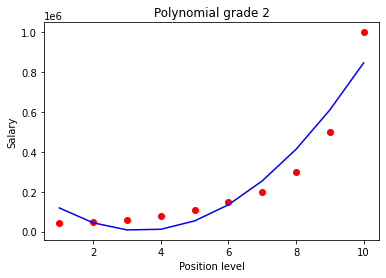

mse 6758833333.333336
rmse 82212.12400451247
r^2 score 0.9162082221443942


In [23]:
# Istället för en rät linje approximerar vi med hjälp av polynom. Grad 2
poly_reg = PolynomialFeatures(degree=2)
X_pos_poly = poly_reg.fit_transform(X_pos)
pol_reg_pos = LinearRegression()
pol_reg_pos.fit(X_pos_poly, y_pos)

# Visualisera den polynomiska regressionens resultat 
y_pol_pred_pos=pol_reg_pos.predict(poly_reg.fit_transform(X_pos))
def viz_polymonial():
    plt.scatter(X_pos, y_pos, color='red')
    plt.plot(X_pos, y_pol_pred_pos, color='blue')
    plt.title('Polynomial grade 2')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

#Beräknar kvalitetsvärden för träningsdata med polynom
print("mse " + str(mean_squared_error(y_pos, y_pol_pred_pos)))
print("rmse " + str(sqrt(mean_squared_error(y_pos, y_pol_pred_pos))))
print("r^2 score "  + str(r2_score(y_pos, y_pol_pred_pos)))


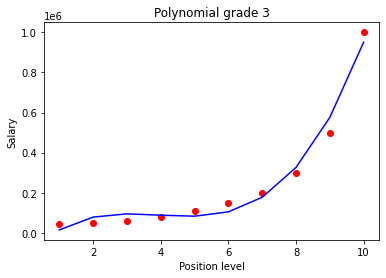

mse 1515662004.662004
rmse 38931.50401232919
r^2 score 0.9812097727913367


In [24]:
# Istället för en rät linje approximerar vi med hjälp av polynom. Grad 3
poly_reg = PolynomialFeatures(degree=3)
X_pos_poly = poly_reg.fit_transform(X_pos)
pol_reg_pos = LinearRegression()
pol_reg_pos.fit(X_pos_poly, y_pos)

# Visualisera den polynomiska regressionens resultat 
y_pol_pred_pos=pol_reg_pos.predict(poly_reg.fit_transform(X_pos))
def viz_polymonial():
    plt.scatter(X_pos, y_pos, color='red')
    plt.plot(X_pos, y_pol_pred_pos, color='blue')
    plt.title('Polynomial grade 3')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

#Beräknar kvalitetsvärden för träningsdata med polynom
print("mse " + str(mean_squared_error(y_pos, y_pol_pred_pos)))
print("rmse " + str(sqrt(mean_squared_error(y_pos, y_pol_pred_pos))))
print("r^2 score "  + str(r2_score(y_pos, y_pol_pred_pos)))

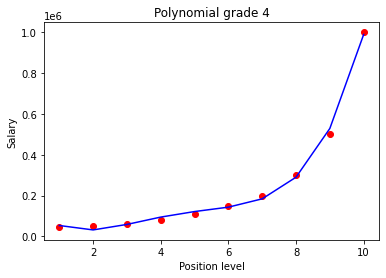

mse 210343822.8438155
rmse 14503.234909626732
r^2 score 0.9973922891706615


In [25]:
# Istället för en rät linje approximerar vi med hjälp av polynom. Grad 4
poly_reg = PolynomialFeatures(degree=4)
X_pos_poly = poly_reg.fit_transform(X_pos)
pol_reg_pos = LinearRegression()
pol_reg_pos.fit(X_pos_poly, y_pos)

# Visualisera den polynomiska regressionens resultat 
y_pol_pred_pos=pol_reg_pos.predict(poly_reg.fit_transform(X_pos))
def viz_polymonial():
    plt.scatter(X_pos, y_pos, color='red')
    plt.plot(X_pos, y_pol_pred_pos, color='blue')
    plt.title('Polynomial grade 4')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

#Beräknar kvalitetsvärden för träningsdata med polynom
print("mse " + str(mean_squared_error(y_pos, y_pol_pred_pos)))
print("rmse " + str(sqrt(mean_squared_error(y_pos, y_pol_pred_pos))))
print("r^2 score "  + str(r2_score(y_pos, y_pol_pred_pos)))

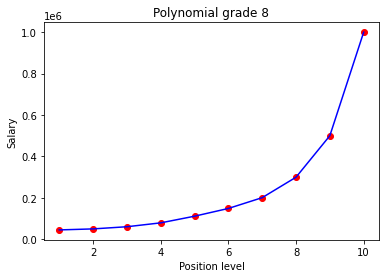

mse 524526.9436685115
rmse 724.2423238588805
r^2 score 0.9999934972438326


In [26]:
# Istället för en rät linje approximerar vi med hjälp av polynom. Grad 8
poly_reg = PolynomialFeatures(degree=8)
X_pos_poly = poly_reg.fit_transform(X_pos)
pol_reg_pos = LinearRegression()
pol_reg_pos.fit(X_pos_poly, y_pos)

# Visualisera den polynomiska regressionens resultat 
y_pol_pred_pos=pol_reg_pos.predict(poly_reg.fit_transform(X_pos))
def viz_polymonial():
    plt.scatter(X_pos, y_pos, color='red')
    plt.plot(X_pos, y_pol_pred_pos, color='blue')
    plt.title('Polynomial grade 8')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

#Beräknar kvalitetsvärden för träningsdata med polynom
print("mse " + str(mean_squared_error(y_pos, y_pol_pred_pos)))
print("rmse " + str(sqrt(mean_squared_error(y_pos, y_pol_pred_pos))))
print("r^2 score "  + str(r2_score(y_pos, y_pol_pred_pos)))

### Hur vet vi när den är overfitted?

Ok, vad ska vi nu ha detta till? Jo, för att beräkna vad för lön man ska erbjuda sina nyanställda för att de ska tacka ja! 

In [27]:
y_pred_sal = lin_reg_sal.predict([[5.5]])
print(y_pred_sal)


[77167.54860916]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
y_pred_pos = pol_reg_pos.predict(poly_reg.fit_transform([[7]]))
print(y_pred_pos)

[200872.48145958]


In [30]:
y_pred_pos = pol_reg_pos.predict(poly_reg.fit_transform([[9]]))
print(y_pred_pos)

[500093.48159947]
